<a href="https://colab.research.google.com/github/DSpike/CoffeeLeafDisease/blob/main/Draft%20V3.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Conv2D, MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization


In [2]:
IMAGE_SIZE=128
BATCH_SIZE=32
CHANNELS=3



In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Dataset1",shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE)

Found 4000 files belonging to 5 classes.


In [5]:
classNames= dataset.class_names

In [6]:
print(classNames)

['Cerscospora', 'Healthy', 'Leaf rust', 'Miner', 'Phoma']


In [ ]:
len(dataset)

1744

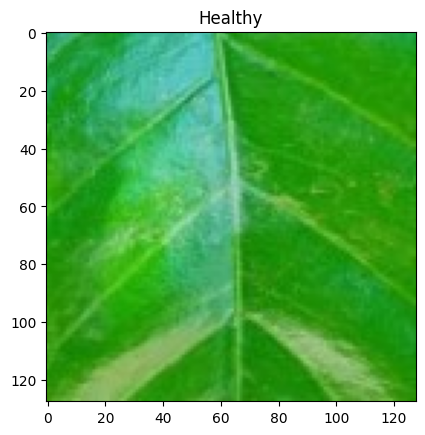

In [ ]:
for image_batch, label_batch in dataset.take(1):
    #for i in range(15):
       # ax=plt.subplot(3,5,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(classNames[label_batch[0]])


In [12]:
train_size=0.8
len(dataset)*train_size

100.0

In [11]:
train_ds=dataset.take(100)

In [24]:

val_size=0.1
len(dataset)*val_size

12.5

In [25]:
val_ds=dataset.take(12)

In [26]:
test_size=0.1
len(dataset)*test_size

12.5

In [27]:
test_ds=dataset.take(12)

In [ ]:
len(test_ds)

174

In [7]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=20)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [8]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [9]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [10]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)

]

)

In [11]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [12]:
input_shape=(None, IMAGE_SIZE,IMAGE_SIZE)
#four diseases and one healthy class
n_classes=5

#from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Input, Reshape, Concatenate, GlobalAveragePooling2D, BatchNormalization, Dropout, Activation, GlobalMaxPooling2D

#trianing the proposed CNN model to diagnoss authomatically leaf disease
model = tf.keras.Sequential ( [
resize_and_rescale,
data_augmentation,
layers.Conv2D (32,(3,3),activation='relu',input_shape=input_shape),
layers.MaxPooling2D(pool_size=(2,2)),
layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
layers.MaxPooling2D(pool_size=(2,2)),
layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
layers.MaxPooling2D(pool_size=(2,2)),
layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
layers.MaxPooling2D(pool_size=(2,2)),
layers.Flatten(),
layers.Dense(128,activation='relu'),
layers.Dense(n_classes,activation='softmax'),
])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer ='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])


In [14]:
model.build(input_shape=(None,IMAGE_SIZE,IMAGE_SIZE,3))


In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 388,933 (1.48 MB)

 Trainable params: 388,933 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:

EPOCHS=10
history=model.fit( train_ds,
                   batch_size=BATCH_SIZE,
                   epochs=EPOCHS,
                   verbose=1,
                   validation_data=val_ds,
                    )

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 576s 125ms/step - accuracy: 0.4715 - loss: 1.2165 - val_accuracy: 0.7188 - val_loss: 0.7275
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7664 - loss: 0.6057 - val_accuracy: 0.7917 - val_loss: 0.5028
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8011 - loss: 0.5090 - val_accuracy: 0.8099 - val_loss: 0.4993
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8678 - loss: 0.3467 - val_accuracy: 0.9375 - val_loss: 0.1852
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8954 - loss: 0.2805 - val_accuracy: 0.9219 - val_loss: 0.1706
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9262 - loss: 0.1840 - val_accuracy: 0.9583 - val_loss: 0.1034
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9420 - loss: 0.1577 - val_accuracy: 0.8464 - val_loss: 0.6043
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9518 - loss: 0.1419 - val_a

In [17]:
model.evaluate(test_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9891 - loss: 0.0601


[0.06817647814750671, 0.9879807829856873]

In [18]:
history.params


{'verbose': 1, 'epochs': 10, 'steps': 100}

In [19]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [20]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

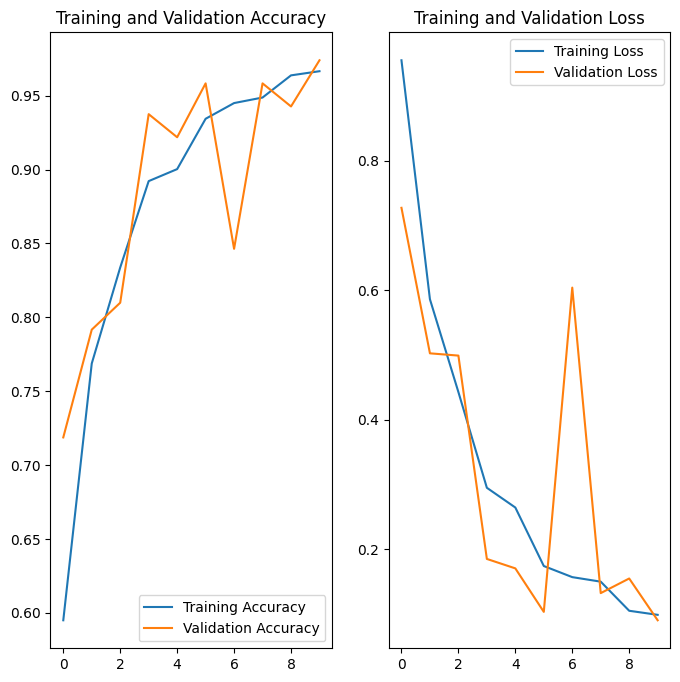

In [22]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()